# Capstone 3:  Step 3 Exploratory Data Analysis

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Get the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.signal import find_peaks
from datetime import datetime,date
from pandas.tseries.offsets import MonthBegin
import plotly.graph_objects as go
from matplotlib import dates

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
df=pd.read_csv('data\step2_output.csv')
df.head()

C:\Users\Nancy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,Type,Source,Amount,Fee,Destination Platform Fee,Net,Currency,Created (UTC),Available On (UTC),...,Customer Facing Currency,Transfer,Transfer Date (UTC),Transfer Group,receipt (metadata),products (metadata),name (metadata),email (metadata),phone (metadata),order (metadata)
0,txn_1H4yaiAEZE0DjbbjyUL3LA0l,charge,ch_1H4yahAEZE0DjbbjNylKh8nq,5.0,0.45,NaN,4.55,usd,2020-07-15 00:35:00,2020-07-17 00:00:00,...,usd,NaN,NaN,NaN,True,"[""ISO-5.1.6""]",NaN,NaN,NaN,NaN
1,txn_1H4wdJAEZE0DjbbjpseDpWHX,charge,ch_1H4wdIAEZE0Djbbjwb6rph5h,1.0,0.34,NaN,0.66,usd,2020-07-14 22:29:00,2020-07-16 00:00:00,...,usd,NaN,NaN,NaN,True,"[""ISO-5.1.6""]",NaN,NaN,NaN,NaN
2,txn_1H4wMhAEZE0Djbbja2ayZO55,charge,ch_1H4wMfAEZE0DjbbjKWLNY2vc,1.0,0.34,NaN,0.66,usd,2020-07-14 22:12:00,2020-07-16 00:00:00,...,usd,NaN,NaN,NaN,True,"[""ISO-5.1.6""]",NaN,NaN,NaN,NaN
3,txn_1H4v2WAEZE0Djbbjif8lMl9m,charge,ch_1H4v2UAEZE0DjbbjGT6iHaTh,10.0,0.59,NaN,9.41,usd,2020-07-14 20:47:00,2020-07-16 00:00:00,...,usd,NaN,NaN,NaN,True,"[""ISO-5.1.6""]",NaN,NaN,NaN,NaN
4,txn_1H4tnzAEZE0DjbbjWcwXA4zN,charge,ch_1H4tnyAEZE0DjbbjEE794to5,1.0,0.33,NaN,0.67,usd,2020-07-14 19:28:00,2020-07-16 00:00:00,...,usd,NaN,NaN,NaN,True,"[""ISO-5.1.6""]",NaN,NaN,NaN,NaN


In [4]:
df.dtypes

id                           object
Type                         object
Source                       object
Amount                      float64
Fee                         float64
Destination Platform Fee    float64
Net                         float64
Currency                     object
Created (UTC)                object
Available On (UTC)           object
Description                  object
Customer Facing Amount      float64
Customer Facing Currency     object
Transfer                     object
Transfer Date (UTC)          object
Transfer Group              float64
receipt (metadata)           object
products (metadata)          object
name (metadata)             float64
email (metadata)            float64
phone (metadata)            float64
order (metadata)            float64
dtype: object

In [5]:
# change the Created (UTC) to a datetime object
df['Created (UTC)']=pd.to_datetime(df['Created (UTC)'])

In [6]:
# get counts and totals for each description group
df.groupby('Description').agg({'Amount':['sum','count'], 
                         'Created (UTC)':['min','max'] })

Amount              Created (UTC)                    
                   sum  count                 min                 max
Description                                                          
Freya 0.3.2   24345.74   4717 2016-03-01 23:48:00 2016-09-09 19:29:00
Hera 5.1      43309.90   5948 2019-12-03 14:52:00 2020-02-07 02:14:00
Hera 5.1.2    27999.07   4249 2020-02-06 03:04:00 2020-04-06 17:11:00
Hera 5.1.3    12683.57   1725 2020-04-06 17:19:00 2020-05-04 18:11:00
Hera 5.1.4    13812.91   2002 2020-05-01 20:41:00 2020-06-05 23:00:00
Hera 5.1.5    11527.81   1788 2020-06-04 16:17:00 2020-07-08 04:29:00
Hera 5.1.6     2104.20    281 2020-07-08 04:48:00 2020-07-15 00:35:00
Juno 5.0     109089.17  15764 2018-10-16 18:58:00 2019-12-03 14:26:00
Loki 0.4.0    63157.24  11139 2016-09-09 17:01:00 2017-05-17 19:07:00
Loki 0.4.1    97672.86  19898 2017-05-17 18:56:00 2018-10-18 10:32:00

## review distribution of individual revenue transactions

The purchase page for elementary os downloads, include three preset amounts: 10, 20, and 30 as well as a "custom" amount. 

In [7]:
# check on groupings of sales
bins= [0,10,10.01,20,20.01,30,30.01,100,500]
labels = ['0-9.99','10','10.01-19.99','20','20.01-29.99','30.00','30.01-100','100+']
df['binGroup'] = pd.cut(df['Amount'], bins=bins, labels=labels, right=False)

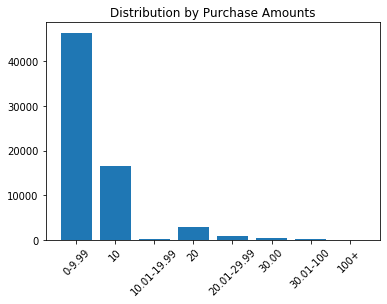

In [8]:
# bar chart of binGroup
plt.xticks(rotation=45)
plt.title('Distribution by Purchase Amounts')
plt.bar(labels,df['binGroup'].value_counts().sort_index())
plt.savefig('figures/fig1 Distribution by Purchase Amounts.png')

### Review how daily average amount and quantity are distributed over time

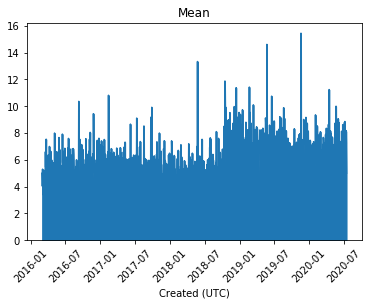

In [9]:
dailymean = df.groupby([df['Created (UTC)'].dt.date])[['Amount']].agg(['mean'])
dailymean.plot.area(legend=None,title="Mean", rot=45)
plt.savefig('figures/fig2 Daily Average Revenue Amounts.png')

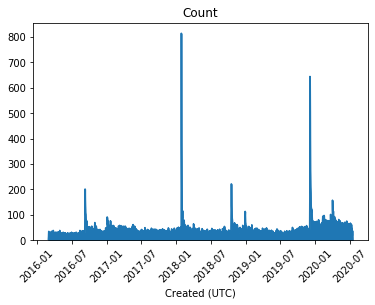

In [10]:
dailyqty = df.groupby([df['Created (UTC)'].dt.date])[['Amount']].agg(['count'])
dailyqty.plot.area(legend=None,title="Count",rot=45)
plt.savefig('figures/fig3 Average Daily Purchase Quantities.png')

### Review Monthly Average Revenue

In [11]:
# create a new field which is the created date converted to the first of each month
df['yyyymm'] = df['Created (UTC)'].dt.normalize().map(MonthBegin().rollback)

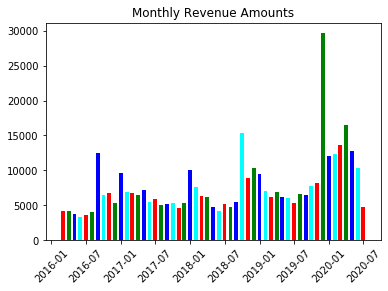

<Figure size 432x288 with 0 Axes>

In [60]:
monthly2 = df.groupby('yyyymm').agg(newtot=('Amount', 'sum'))

plt.bar(monthly2.index, monthly2.newtot,color=[ 'red', 'green', 'blue', 'cyan'],width=20)
plt.xticks(rotation=45)
plt.title('Monthly Revenue Amounts')
plt.show()

plt.savefig('figures/fig4 Monthly Revenue Amounts.png')

In [13]:
# create a column in monthly2 that contains the index values
monthly2['x']=monthly2.index
monthly2.columns = monthly2.columns.droplevel(1)

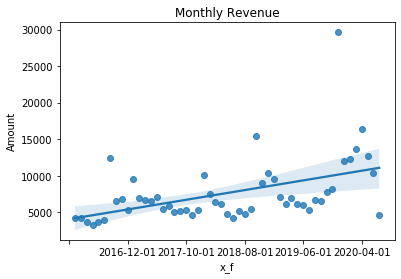

In [14]:
# seaborn regression plot does not deal well with datetimes, convert the x axis input and plot
monthly2 = monthly2.sort_values('x')
monthly2['x_f'] = pd.factorize(monthly2['x'])[0] + 1
mapping = dict(zip(monthly2['x_f'], monthly2['x'].dt.date))

ax = sns.regplot('x_f', 'Amount', data=monthly2)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_title('Monthly Revenue')
plt.savefig('figures/fig5 Monthly Revenue Regression.png')

### There are some rather distinct peaks in the revenue streams

Identify the dates

In [15]:
# mark first dates on graph
firsts = df.groupby(df['Description'])[['Created (UTC)']].agg(['min'])

In [16]:
# get release date by finding minimum date for each release
first_vals = []
for x in firsts['Created (UTC)', 'min']:
    first_vals.append(x.date())

In [17]:
time_series = pd.Series(dailyqty[('Amount', 'count')].values, index=dailyqty.index)

In [19]:
indices = find_peaks(time_series, height=100, plateau_size=1, prominence = 25)[0]
x_vals = dailyqty.index

fig = go.Figure()
fig.add_trace(go.Scatter(x=x_vals,
    y=time_series,
    mode='lines+markers',
    name='Original Plot'
))

fig.add_trace(go.Scatter(
    x=[dailyqty.index[k] for k in indices],
    y=[time_series[j] for j in indices],
    mode='markers',
    marker=dict(
        size=8,
        color='red',
        symbol='cross'
    ),
    name='Detected Peaks'
))

fig.add_trace(go.Scatter(
    x=first_vals,
    y=[time_series[f] for f in first_vals],
    mode='markers',
    marker=dict(
        size=8,
        color='blue',
        symbol='cross'
    ),
    name='New Releases'
))

fig.show()
fig.write_image('figures/fig6 Revenue Peaks.png')

### How does distribution look by release

In [20]:
# summarize to the daily level
df3 = df.groupby([df['Created (UTC)'].dt.date, 'Description'])[['Amount']].sum()
# now prepare for area plot
df4 = df.groupby([df['Created (UTC)'].dt.date, 'Description'])[['Amount']].sum().unstack()

In [21]:
df3['date']=df3.index.get_level_values(level=0)
df3['release']=df3.index.get_level_values(level=1)

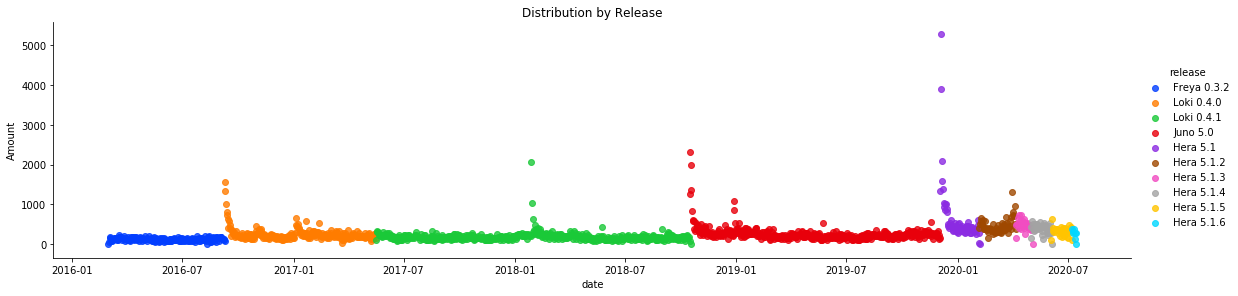

In [66]:
sns.lmplot('date', 'Amount', data=df3, hue='release', fit_reg=False, height=4, aspect=4, palette=sns.color_palette("bright", 12))
ax = plt.gca()
ax.set_title('Distribution by Release')
plt.savefig('figures/fig7 Distribution by Release.png',bbox_inches='tight',pad_inches=0)

plt.show()